## Wordle Experiment - The Story

### by Sharon Dill
### April 2022

### The backstory
Two players decided to do a 40 day wordle experiment to see if the starting word really made a difference with the final score.

- **Round 1**: Each player started with one word, but it had to be the same word for ten days.  PlayerA used DATES and PlayerB's  word was STEAM. They didn't know each other's word until after the round.
- **Round 2**: Both players randomly picked a new word each day.
- **Round 3**: Both used ADIEU since that was once suggested to be THE best starting word.  
- **Round 4**: Both started with STERN since they wanted lots of consanants after all the vowels in ADIEU in Round 3.
- Note: a word that was not guessed within the six tries was given a score of 7.

In [1]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('WordleExperiment2022.csv')

### How did the players do?

PlayerA had an average score of 4.33 and PlayerB had 4.30.


In [2]:
df.groupby('Player')['Score'].mean()

Player
Player A   4.33
Player B   4.30
Name: Score, dtype: float64

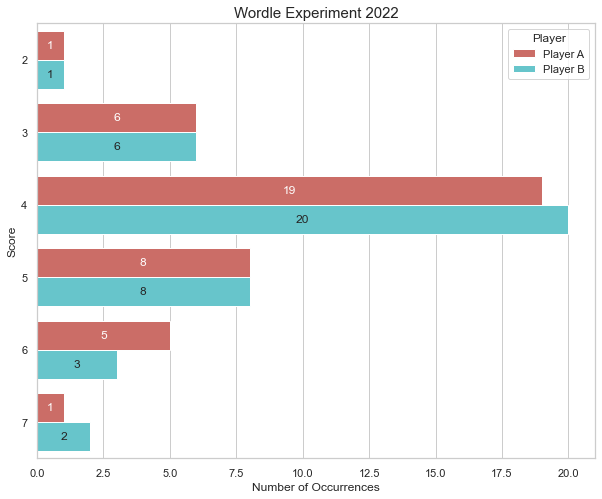

In [3]:
# create a dataframe for counts
counted = df.groupby(['Player','Score'])['Date'].count().reset_index()
# setup seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("hls", 2)
# setup plot
plt.figure(figsize=(10,8))
_ = sns.barplot(data = counted, x = 'Date', y = 'Score', hue = 'Player', orient = 'h');
plt.bar_label(_.containers[0], label_type = 'center', color = 'w');
plt.bar_label(_.containers[1], label_type = 'center');
plt.xlabel('Number of Occurrences', size = 12);
plt.ylabel('Score', size = 12);
plt.title('Wordle Experiment 2022', size = 15); 
plt.show();

### How did they do by round?
- Round 1: PlayerA started with STEAM and PlayerB started with DATES
- Round 2: Different start word each day
 - PlayerA used: GRAND, SPORT, SHARP, TRADE, TRAIN, LEARN, SPEAK, BLEND, DATES, STRAP
 - PlayerB used: LIONS, PLATE, POINT, TIMER, BLEND, PILOT, TREND, MINOR, ROUTE, GRATE
- Round 3: Both started with ADIEU
- Round 4: Both started with STERN

#### Drum roll....
- Round 1: PlayerA did better
- Round 2: Tie
- Round 3: PlayerB did better
- Round 4: PlayerB did better

In [4]:
df.groupby(['Player','Round'])['Score'].mean()

Player    Round
Player A  1       3.80
          2       4.20
          3       4.80
          4       4.50
Player B  1       4.10
          2       4.20
          3       4.60
          4       4.30
Name: Score, dtype: float64

### Let's take into account the difficulty of the word.

Each word had a difficulty score calculated based on the letter points from Words With Friends.  Letters that repeat will be worth an extra point for each repeat.

For example:
- LAPSE has a difficulty of 9
- WATCH has a difficulty of 13
- ALLOW has a difficulty of 12 with the repeating L adding one more point

### Points based on Word With Friends letter values

| Points | Letters |
| -- |:-------------: | 
| 1 Point | For each repeating letter |
| 1 Point | A,E,I,O,R,S,T |
| 2 Points | D,L,N,U |
| 3 Points | G,H,Y |
| 4 Points | B,C,F,M,P,W |
| 5 Points | K,V |
| 8 Points | X |
| 10 Points | J,Q,Z |

### Was each round equally difficult?

The rounds were not equally difficult.  Round 1 was significantly easier than rounds 2 and 4.

In [5]:
df.groupby('Round')['difficulty'].mean()

Round
1    9.60
2   11.30
3   10.90
4   12.40
Name: difficulty, dtype: float64

### Let's create some difficulty categories
- **1 Easy** is under 8 points (example: tease, saute)
- **2 Medium** is 8-10 points (example: today, slosh)
- **3 Hard** is 11-13 points (example: focus, movie)
- **4 Very Hard** is over 13 points (example: epoxy, nymph)

#### Results by category:
- It is not clear if the categories are appropriately named, but if they are - the Hard category gave both players the most trouble.  


In [6]:
df.groupby(['Player','Type'])['Score'].mean()

Player    Type       
Player A  1 Easy        4.00
          2 Medium      4.13
          3 Hard        4.69
          4 Very Hard   4.25
Player B  1 Easy        3.00
          2 Medium      4.40
          3 Hard        4.77
          4 Very Hard   4.00
Name: Score, dtype: float64

### Does the starting word matter?

Wordle has a list of 2308 words that are considered reasonable five letter words (there are an additional 10k five letter words, but these are more obscure like FEMES, DORBS and FINIS). To determine the number of possible guesses available from the first guess, the following steps were taken:
- take all letters in the correct position (aka green letters) and create a word list
- from the list, keep the words that contain correct letters in the wrong position (aka yellow letters)
- from the list, omit any words that contain incorrect letters (aka gray letters)

For example:
- Guess word of STRAP for the word SHALL has S as a green letter, A as a yellow letter, T, R, P as gray letters and resulted in 71 possible words after the first guess. Score on this one was one 4.
- Guess word of STEAM for the word SMELT has S, E as green letters, T, M as yellow letters, A as a gray letters and resulted in only 1 possible word after the first guess! Score on this one was a 2.
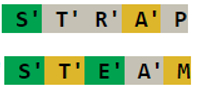

### Starting word versus Actual word

The lower the number of possible guesses means there were fewer words to choose from after the first guess. In theory, the fewer words left should give the player a good start and lead to a better score.

- Round 1: PlayerB did slightly better with the starting word of DATES with on average 65 words left to choose from.
- Round 2: PlayerA did much better with the different starting words with 77 words left to choose from versus 118 for PlayerB.
- Round 3 and 4: Since both had the same starting word, the number of available words was the same for both.


In [7]:
df.groupby(['Player','Round'])['wordsRemain'].mean()

Player    Round
Player A  1        67.10
          2        77.30
          3       280.60
          4       142.10
Player B  1        65.30
          2       117.80
          3       280.60
          4       142.10
Name: wordsRemain, dtype: float64

### Did the starting word make a difference?  Or said another way - did having fewer words to choose from after the first round matter?

- Round 1: PlayerB had a better start but not a better score
- Round 2: PlayerA had a better start, but they tied in the average score of the round
- Round 3: Equal start, PlayerB had a better average score
- Round 4: Equal start, but PlayerB had a better score.
- Conclusion: The players think the second guess is just as important as the first guess. Too bad we didn't track the second guess. Poor experimental design for sure.

Round 3 was the worst score for both players AND the most number of remaining words, so the moral of the story is **do not start with ADIEU.**

In [8]:
df.groupby(['Player','Round'])['Score'].mean()

Player    Round
Player A  1       3.80
          2       4.20
          3       4.80
          4       4.50
Player B  1       4.10
          2       4.20
          3       4.60
          4       4.30
Name: Score, dtype: float64

### Correlation is not causation.....

The .36 positive correlation between the Score and the number of words remaining suggest that **the starting word does make a difference**. (Even though this is not a high correlation, it is significant).

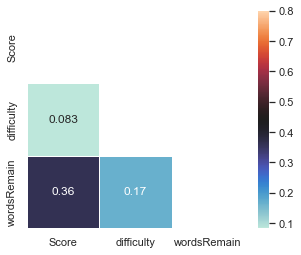

In [9]:
# is there a correlation with Score?
import numpy as np
columns = ['Score','difficulty','wordsRemain']
df_corr = df[columns]
corrmat = df_corr.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corrmat, vmax = .8, square =  True, mask = mask, annot = True, cmap = 'icefire', linewidths = .5);

### Below is some sample data

In [10]:
df.sample(5)

,Date,Round,Attempt,Score,Player,Word,Guess,difficulty,Type,wordsRemain
75,2022-04-17,4,6,3,Player B,ample,stern,12,3 Hard,216
12,2022-03-22,2,3,4,Player A,slosh,sharp,10,2 Medium,31
0,2022-03-10,1,1,3,Player A,lapse,steam,9,2 Medium,48
5,2022-03-15,1,6,4,Player A,tease,steam,7,1 Easy,25
54,2022-03-24,2,5,4,Player B,chest,blend,10,2 Medium,78


### Summary

ADIEU was not the best starting as this resulted in the most words still available to guess from and the worst score for both players.<br>
The starting word does make a difference where a good first guess that resulted in fewer remaining words did result in a better score.<br>

We could calculate the best starting word based on the 2308 words in the list - but what would be the fun of that for our daily wordle?
<br>
